In [222]:
%config Completer.use_jedi = False

import os
import pandas as pd
from tqdm import tqdm
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from rdkit import Chem
from rdkit.Chem import AllChem, rdFMCS, DataStructs, Draw
import umap
import matplotlib.pyplot as plt

In [5]:
temps = pd.read_csv('../../docking/data/selected_templates_updated_2024.csv', usecols=['UniProt_ID', 'Template', 'Smiles_String'])
pdb_uni_dict = dict(zip(temps.Template, temps.UniProt_ID))

# Get successfully docked ligands

In [2]:
new_baff_list = []
temps = os.listdir('../complexes/')

for temp in tqdm(temps):
    sdfs = [i.split('.')[0] for i in os.listdir(f'../complexes/{temp}') if '.sdf' in i]
    for sdf in sdfs:
        new_baff_list.append({'Template': temp,
                              'Docked': sdf
                             })

100%|██████████| 6856/6856 [01:48<00:00, 63.07it/s]


In [3]:
new_df = pd.DataFrame(new_baff_list)
new_df

,Template,Docked
0,4WNO_3RF,CHEMBL5274568
1,4WNP_3RJ,BINDINGDB50111577
2,4WNP_3RJ,CHEMBL3605055
3,5CI7_51W,BINDINGDB50111573
4,5CI7_51W,BINDINGDB17051
...,...,...
58874,5CR5_EL1,CHEMBL3623146
58875,5I5X_68C,BINDINGDB50162342
58876,5BWW_4W6,BINDINGDB50118614
58877,5BWW_4W6,CHEMBL3617088


In [19]:
temps

,UniProt_ID,Template,Smiles_String
0,A0A024E3Q2,4MWQ_G39,CCC(CC)O[C@@H]1C=C(C[C@@H]([C@H]1NC(=O)C)N)C(=O)O
1,A0A024E3Q2,4MWR_ZMR,[H]/N=C(N)/N[C@H]1C=C(O[C@H]([C@@H]1NC(=O)C)[C...
2,A0A024E3Q2,4MWU_LNV,[H]/N=C(N)/N[C@H]1C=C(O[C@H]([C@@H]1NC(=O)C)[C...
3,A0A024E3Q2,4MWV_BCZ,CCC(CC)[C@@H]([C@H]1[C@@H](C[C@@H]([C@H]1O)C(=...
4,A0A024V0B1,4ZY0_4TM,CC(C)(C)C(=O)N[C@H](c1ccc(cc1)c2ccsc2)C(=O)NO
...,...,...,...
16767,Q8IVV7,7U3K_L73,CCCCNCC(=O)NC(Cc1ccc(cc1)C(C)(C)C)C(=O)NC(Cc2c...
16768,Q8IVV7,7U3L_L4X,Cc1ccc(cc1)CC(C(=O)NC)NC(=O)C(CC=Cc2ccccc2)NC(...
16769,K9N7C7,8CZT_P8L,CC(C)CC(C(=O)NC(CC1CCNC1=O)C(O)[S+](=O)(O)O)NC...
16770,K9N7C7,8E6B_URR,CC(C)CC(C(=O)NC(CC1CCNC1=O)C(O)S(=O)(=O)O)NC(=...


In [6]:
for i, temp, dock in new_df.itertuples():
    try:
        new_df.loc[i, 'UniProt_ID'] = pdb_uni_dict[temp]
    except: print(temp, dock)
new_df

,Template,Docked,UniProt_ID
0,4WNO_3RF,CHEMBL5274568,O75385
1,4WNP_3RJ,BINDINGDB50111577,O75385
2,4WNP_3RJ,CHEMBL3605055,O75385
3,5CI7_51W,BINDINGDB50111573,O75385
4,5CI7_51W,BINDINGDB17051,O75385
...,...,...,...
58874,5CR5_EL1,CHEMBL3623146,O15382
58875,5I5X_68C,BINDINGDB50162342,O15382
58876,5BWW_4W6,BINDINGDB50118614,O15382
58877,5BWW_4W6,CHEMBL3617088,O15382


In [8]:
bdb = new_df[new_df.Docked.str.contains("BINDINGDB")]
bdb['Docked'] = bdb['Docked'].str.replace('BINDINGDB', '', regex=False).astype(int)
bdb

/scratch/software/miniconda3/envs/DrugPred_RNA/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Template,Docked,UniProt_ID
1,4WNP_3RJ,50111577,O75385
3,5CI7_51W,50111573,O75385
4,5CI7_51W,17051,O75385
5,5CI7_51W,50111575,O75385
9,7N3L_04Y,50583502,Q9Y6A2
...,...,...,...
58872,5CR5_EL1,50122747,O15382
58873,5CR5_EL1,50122750,O15382
58875,5I5X_68C,50162342,O15382
58876,5BWW_4W6,50118614,O15382


In [9]:
che = new_df[new_df.Docked.str.contains("CHEMBL")]
che

,Template,Docked,UniProt_ID
0,4WNO_3RF,CHEMBL5274568,O75385
2,4WNP_3RJ,CHEMBL3605055,O75385
6,5CI7_51W,CHEMBL3603853,O75385
7,5CI7_51W,CHEMBL577784,O75385
8,5CI7_51W,CHEMBL3605056,O75385
...,...,...,...
58868,5BWV_775,CHEMBL3617098,O15382
58869,5CR5_EL1,CHEMBL3623145,O15382
58870,5CR5_EL1,CHEMBL3623144,O15382
58874,5CR5_EL1,CHEMBL3623146,O15382


# Load BindingDB and select Baff

In [11]:
full_bdb = pd.read_csv('../../docking/data/BindingDB_activities_for_BindingMOAD_2024.csv')
full_bdb

KeyboardInterrupt: 

In [17]:
full_bdb = full_bdb.rename(columns={'UniProt (SwissProt) Primary ID of Target Chain': 'UniProt_ID',
                                    'BindingDB MonomerID': 'Docked'})

In [18]:
filtered_bdb = full_bdb.merge(bdb, on=['UniProt_ID', 'Docked'], how='inner')

filtered_bdb = filtered_bdb.drop(columns=['BindingDB Reactant_set_id',
                                          'Link to Ligand in BindingDB',
                                          'Link to Target in BindingDB',
                                          'Link to Ligand-Target Pair in BindingDB',
                                          'Ligand HET ID in PDB', 'PDB ID(s) for Ligand-Target Complex',
                                          'PubChem CID',
                                          'PubChem SID',
                                          'ChEBI ID of Ligand',
                                          'ChEMBL ID of Ligand',
                                          'DrugBank ID of Ligand',
                                          'IUPHAR_GRAC ID of Ligand',
                                          'KEGG ID of Ligand',
                                          'ZINC ID of Ligand',
                                          'Number of Protein Chains in Target (>1 implies a multichain complex)',
                                          'BindingDB Target Chain Sequence',
                                          'PDB ID(s) of Target Chain',
                                          'UniProt (SwissProt) Recommended Name of Target Chain',
                                          'UniProt (SwissProt) Entry Name of Target Chain'])


cols = list(filtered_bdb.columns)
first_cols = ['UniProt_ID', 'Template', 'Docked']
new_order = first_cols + [col for col in cols if col not in first_cols]
filtered_bdb = filtered_bdb[new_order]

filtered_bdb

,UniProt_ID,Template,Docked,Ligand SMILES,Ki (nM),IC50 (nM),Kd (nM),Curation/DataSource,Article DOI,BindingDB Entry DOI,PMID,PubChem AID,Patent Number,Authors,Institution
0,P51570,6ZFH_QV2,2764,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,NaN,6676.9,NaN,US Patent,NaN,10.7270/Q25Q4V08,NaN,aid1803473,US9447087,"Boxer, MB; Walsh, MJ; Liu, L; Tanega, CD; Shen...",University of Utah Research Foundation
1,P04585,6DIF_TPV,557,CCC[C@]1(CCc2ccccc2)CC(=O)C([C@H](CC)c2cccc(NS...,0.018,NaN,NaN,Curated from the literature by BindingDB,10.1021/jm960541s,10.7270/Q2HQ3X35,8893827.0,aid1795257,NaN,"Thaisrivongs, S; Skulnick, HI; Turner, SR; Str...",Upjohn
2,P04585,6DIL_TPV,557,CCC[C@]1(CCc2ccccc2)CC(=O)C([C@H](CC)c2cccc(NS...,0.018,NaN,NaN,Curated from the literature by BindingDB,10.1021/jm960541s,10.7270/Q2HQ3X35,8893827.0,aid1795257,NaN,"Thaisrivongs, S; Skulnick, HI; Turner, SR; Str...",Upjohn
3,P04585,6DIF_TPV,558,CCC[C@@]1(CCc2ccccc2)CC(=O)C([C@H](CC)c2cccc(N...,0.008,NaN,NaN,Curated from the literature by BindingDB,10.1021/jm960541s,10.7270/Q2HQ3X35,8893827.0,aid1795257,NaN,"Thaisrivongs, S; Skulnick, HI; Turner, SR; Str...",Upjohn
4,P04585,6DIL_TPV,558,CCC[C@@]1(CCc2ccccc2)CC(=O)C([C@H](CC)c2cccc(N...,0.008,NaN,NaN,Curated from the literature by BindingDB,10.1021/jm960541s,10.7270/Q2HQ3X35,8893827.0,aid1795257,NaN,"Thaisrivongs, S; Skulnick, HI; Turner, SR; Str...",Upjohn
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78899,O60885,8PXM_ZTY,50607743,COCCOc1ccc2[C@@H](C)C(=O)N(C)C=Cc2c1,NaN,316,NaN,ChEMBL,NaN,10.7270/Q2QN6BWR,36378954.0,NaN,NaN,"Humphreys, PG; Anderson, NA; Bamborough, P; Ba...",GSK
78900,O60885,8PXN_ZTT,50607744,CC1c2ccc(OCC(C)(C)O)cc2C=CN(C)C1=O,NaN,794,NaN,ChEMBL,NaN,10.7270/Q2QN6BWR,36378954.0,NaN,NaN,"Humphreys, PG; Anderson, NA; Bamborough, P; Ba...",GSK
78901,O60885,8PXM_ZTY,50607744,CC1c2ccc(OCC(C)(C)O)cc2C=CN(C)C1=O,NaN,794,NaN,ChEMBL,NaN,10.7270/Q2QN6BWR,36378954.0,NaN,NaN,"Humphreys, PG; Anderson, NA; Bamborough, P; Ba...",GSK
78902,O60885,8PXN_ZTT,50607744,CC1c2ccc(OCC(C)(C)O)cc2C=CN(C)C1=O,NaN,251,NaN,ChEMBL,NaN,10.7270/Q2QN6BWR,36378954.0,NaN,NaN,"Humphreys, PG; Anderson, NA; Bamborough, P; Ba...",GSK


In [19]:
filtered_bdb.to_csv('../data/BindingDB_activities_raw.csv', index=False)

# Load ChEMBL and select Baff

In [35]:
full_che = pd.read_csv('../data/ChEMBL_activities_for_bindingMOAD_2024.csv')
full_che

,accession,molecule_chembl_id,standard_type,standard_relation,standard_value,standard_units,standard_inchi_key,canonical_smiles,target_chembl_id,assay_chembl_id,variant_id,chirality,activity_id,pchembl_value
0,A4TVL0,CHEMBL3764647,Kd,=,3300.0,nM,KBGZUKXZFDPDRE-UHFFFAOYSA-N,CNc1ccccc1C(=O)NCCn1ccc(=O)[nH]c1=O,CHEMBL3763007,CHEMBL3768093,NaN,-1.0,16469712.0,5.48
1,A4TVL0,CHEMBL3764647,Kd,=,22900.0,nM,KBGZUKXZFDPDRE-UHFFFAOYSA-N,CNc1ccccc1C(=O)NCCn1ccc(=O)[nH]c1=O,CHEMBL3763007,CHEMBL3768096,1442.0,-1.0,16469715.0,4.64
2,A4TVL0,CHEMBL3763941,IC50,=,48900.0,nM,KNCYXPMJDCCGSJ-UHFFFAOYSA-N,O=C1CCCC(=O)N1,CHEMBL3763007,CHEMBL3768097,NaN,-1.0,16469704.0,4.31
3,A4TVL0,CHEMBL275661,IC50,=,7600.0,nM,KZNICNPSHKQLFF-UHFFFAOYSA-N,O=C1CCC(=O)N1,CHEMBL3763007,CHEMBL3768097,NaN,2.0,16469716.0,5.12
4,A4TVL0,CHEMBL275661,IC50,=,53000.0,nM,KZNICNPSHKQLFF-UHFFFAOYSA-N,O=C1CCC(=O)N1,CHEMBL3763007,CHEMBL3768100,1442.0,2.0,16469719.0,4.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596825,Q96RU2,CHEMBL4591793,IC50,=,200.0,nM,RTHMDRYYSJBOSN-CQSZACIVSA-N,Cc1ccc2c(N)c(C(=O)NC[C@@H](C)c3ccc(N4CCNCC4)cc...,CHEMBL2157853,CHEMBL4477145,NaN,-1.0,19463652.0,6.70
596826,Q96RU2,CHEMBL4442615,IC50,=,700.0,nM,ITHSFXDGKQYOED-UHFFFAOYSA-N,OCCNCc1cc(Br)ccc1OCc1ccc(F)c(C(F)(F)F)c1,CHEMBL2157853,CHEMBL5234107,NaN,-1.0,25004199.0,6.16
596827,Q96RU2,CHEMBL5273364,IC50,=,1100.0,nM,FUYSDKCEPZFKSP-UHFFFAOYSA-N,OCCNCc1cc(Br)ccc1OCc1cccc(OC(F)(F)F)c1,CHEMBL2157853,CHEMBL5234107,NaN,-1.0,25004200.0,5.96
596828,Q96RU2,CHEMBL1625370,IC50,=,59600.0,nM,ZPZPYTMGKBNQPF-UHFFFAOYSA-N,OCCNCc1cc(Br)ccc1OCc1ccccc1,CHEMBL2157853,CHEMBL5234107,NaN,-1.0,25004201.0,4.22


In [36]:
full_che = full_che.rename(columns={'accession': 'UniProt_ID',
                                    'molecule_chembl_id': 'Docked'})




In [51]:
filtered_che = full_che.merge(che, on=['UniProt_ID', 'Docked'], how='inner')


In [52]:
filtered_che

,UniProt_ID,Docked,standard_type,standard_relation,standard_value,standard_units,standard_inchi_key,canonical_smiles,target_chembl_id,assay_chembl_id,variant_id,chirality,activity_id,pchembl_value,Template
0,A4TVL0,CHEMBL4455877,Ki,=,12000.00,nM,ZQAUOFWDVHCTPN-UHFFFAOYSA-N,Nc1ccc2c(c1)C(=O)N(C1CC(=O)NC1=O)C2=O,CHEMBL3763007,CHEMBL4366978,NaN,-1.0,19093417.0,4.92,6R11_JOB
1,A4TVL0,CHEMBL4437349,Ki,=,9000.00,nM,LBWIBZYKUVIBKH-UHFFFAOYSA-N,O=C1CC(NC(=O)c2c(Cl)cc(Cl)cc2Cl)C(=O)N1,CHEMBL3763007,CHEMBL4366978,NaN,-1.0,19093420.0,5.05,6R1K_JPB
2,A5H660,CHEMBL3797232,IC50,=,191.40,nM,UYUPOQDZJBPUTQ-UHFFFAOYSA-N,O=C(NO)c1ccc(Cl)c(NC(=O)c2ccc(Cl)cc2Cl)c1,CHEMBL3797017,CHEMBL3803623,NaN,-1.0,16569587.0,6.72,6HU0_T86
3,A5H660,CHEMBL3797232,IC50,=,191.40,nM,UYUPOQDZJBPUTQ-UHFFFAOYSA-N,O=C(NO)c1ccc(Cl)c(NC(=O)c2ccc(Cl)cc2Cl)c1,CHEMBL3797017,CHEMBL3803623,NaN,-1.0,16569587.0,6.72,6HU1_GT2
4,A5H660,CHEMBL3797232,IC50,=,190.55,nM,UYUPOQDZJBPUTQ-UHFFFAOYSA-N,O=C(NO)c1ccc(Cl)c(NC(=O)c2ccc(Cl)cc2Cl)c1,CHEMBL3797017,CHEMBL4014727,NaN,-1.0,18068473.0,6.72,6HU0_T86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54402,Q8IVV7,CHEMBL5189044,IC50,=,18900.00,nM,SJAZZYOCOXNSIX-UHFFFAOYSA-N,Nc1cccc2c1CCNC2c1ccccc1,CHEMBL5169174,CHEMBL5106704,NaN,-1.0,24695813.0,4.72,7U3G_L6F
54403,Q8IVV7,CHEMBL5189044,Kd,=,17.00,nM,SJAZZYOCOXNSIX-UHFFFAOYSA-N,Nc1cccc2c1CCNC2c1ccccc1,CHEMBL5169174,CHEMBL5106705,NaN,-1.0,24695824.0,7.77,7U3G_L6F
54404,Q8IVV7,CHEMBL5208789,IC50,=,5400.00,nM,TUQBDKJHGPFTTD-BKMJKUGQSA-N,CNC(=O)[C@H](CCc1ccccc1)NC(=O)[C@H](NC(=O)CNCc...,CHEMBL5169174,CHEMBL5106704,NaN,-1.0,24695818.0,5.27,7U3J_L6U
54405,Q8IVV7,CHEMBL5177515,IC50,=,4700.00,nM,VWEUUVZMTLGMMV-IZZNHLLZSA-N,CCCCNCC(=O)N[C@H](Cc1ccc(C(C)(C)C)cc1)C(=O)N[C...,CHEMBL5169174,CHEMBL5106704,NaN,-1.0,24695819.0,5.33,7U3K_L73


In [54]:
filtered_che['Ki (nM)'] = None
filtered_che['Kd (nM)'] = None
filtered_che['IC50 (nM)'] = None

for idx, row in tqdm(filtered_che.iterrows(), total=len(filtered_che)):
    aff = row['standard_type']
    val = row['standard_value']    
    if aff == 'Ki':
        filtered_che.loc[idx, 'Ki (nM)'] = val
    elif aff == 'Kd':
        filtered_che.loc[idx, 'Kd (nM)'] = val
    elif aff == 'IC50':
        filtered_che.loc[idx, 'IC50 (nM)'] = val

100%|██████████| 54407/54407 [02:11<00:00, 412.36it/s]


In [56]:
filtered_che

,UniProt_ID,Docked,standard_type,standard_relation,standard_value,standard_units,standard_inchi_key,canonical_smiles,target_chembl_id,assay_chembl_id,variant_id,chirality,activity_id,pchembl_value,Template,Ki (nM),Kd (nM),IC50 (nM)
0,A4TVL0,CHEMBL4455877,Ki,=,12000.00,nM,ZQAUOFWDVHCTPN-UHFFFAOYSA-N,Nc1ccc2c(c1)C(=O)N(C1CC(=O)NC1=O)C2=O,CHEMBL3763007,CHEMBL4366978,NaN,-1.0,19093417.0,4.92,6R11_JOB,12000,None,None
1,A4TVL0,CHEMBL4437349,Ki,=,9000.00,nM,LBWIBZYKUVIBKH-UHFFFAOYSA-N,O=C1CC(NC(=O)c2c(Cl)cc(Cl)cc2Cl)C(=O)N1,CHEMBL3763007,CHEMBL4366978,NaN,-1.0,19093420.0,5.05,6R1K_JPB,9000,None,None
2,A5H660,CHEMBL3797232,IC50,=,191.40,nM,UYUPOQDZJBPUTQ-UHFFFAOYSA-N,O=C(NO)c1ccc(Cl)c(NC(=O)c2ccc(Cl)cc2Cl)c1,CHEMBL3797017,CHEMBL3803623,NaN,-1.0,16569587.0,6.72,6HU0_T86,None,None,191.4
3,A5H660,CHEMBL3797232,IC50,=,191.40,nM,UYUPOQDZJBPUTQ-UHFFFAOYSA-N,O=C(NO)c1ccc(Cl)c(NC(=O)c2ccc(Cl)cc2Cl)c1,CHEMBL3797017,CHEMBL3803623,NaN,-1.0,16569587.0,6.72,6HU1_GT2,None,None,191.4
4,A5H660,CHEMBL3797232,IC50,=,190.55,nM,UYUPOQDZJBPUTQ-UHFFFAOYSA-N,O=C(NO)c1ccc(Cl)c(NC(=O)c2ccc(Cl)cc2Cl)c1,CHEMBL3797017,CHEMBL4014727,NaN,-1.0,18068473.0,6.72,6HU0_T86,None,None,190.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54402,Q8IVV7,CHEMBL5189044,IC50,=,18900.00,nM,SJAZZYOCOXNSIX-UHFFFAOYSA-N,Nc1cccc2c1CCNC2c1ccccc1,CHEMBL5169174,CHEMBL5106704,NaN,-1.0,24695813.0,4.72,7U3G_L6F,None,None,18900
54403,Q8IVV7,CHEMBL5189044,Kd,=,17.00,nM,SJAZZYOCOXNSIX-UHFFFAOYSA-N,Nc1cccc2c1CCNC2c1ccccc1,CHEMBL5169174,CHEMBL5106705,NaN,-1.0,24695824.0,7.77,7U3G_L6F,None,17,None
54404,Q8IVV7,CHEMBL5208789,IC50,=,5400.00,nM,TUQBDKJHGPFTTD-BKMJKUGQSA-N,CNC(=O)[C@H](CCc1ccccc1)NC(=O)[C@H](NC(=O)CNCc...,CHEMBL5169174,CHEMBL5106704,NaN,-1.0,24695818.0,5.27,7U3J_L6U,None,None,5400
54405,Q8IVV7,CHEMBL5177515,IC50,=,4700.00,nM,VWEUUVZMTLGMMV-IZZNHLLZSA-N,CCCCNCC(=O)N[C@H](Cc1ccc(C(C)(C)C)cc1)C(=O)N[C...,CHEMBL5169174,CHEMBL5106704,NaN,-1.0,24695819.0,5.33,7U3K_L73,None,None,4700


In [58]:
filtered_che.to_csv('../data/ChEMBL_activities_raw.csv')

# Process ChEMBL binding affinities and get a final unique dataset

In [154]:
filtered_che = pd.read_csv('../data/ChEMBL_activities_raw.csv')
filtered_che

,Unnamed: 0,UniProt_ID,Docked,standard_type,standard_relation,standard_value,standard_units,standard_inchi_key,canonical_smiles,target_chembl_id,assay_chembl_id,variant_id,chirality,activity_id,pchembl_value,Template,Ki (nM),Kd (nM),IC50 (nM)
0,0,A4TVL0,CHEMBL4455877,Ki,=,12000.00,nM,ZQAUOFWDVHCTPN-UHFFFAOYSA-N,Nc1ccc2c(c1)C(=O)N(C1CC(=O)NC1=O)C2=O,CHEMBL3763007,CHEMBL4366978,NaN,-1.0,19093417.0,4.92,6R11_JOB,12000.0,NaN,NaN
1,1,A4TVL0,CHEMBL4437349,Ki,=,9000.00,nM,LBWIBZYKUVIBKH-UHFFFAOYSA-N,O=C1CC(NC(=O)c2c(Cl)cc(Cl)cc2Cl)C(=O)N1,CHEMBL3763007,CHEMBL4366978,NaN,-1.0,19093420.0,5.05,6R1K_JPB,9000.0,NaN,NaN
2,2,A5H660,CHEMBL3797232,IC50,=,191.40,nM,UYUPOQDZJBPUTQ-UHFFFAOYSA-N,O=C(NO)c1ccc(Cl)c(NC(=O)c2ccc(Cl)cc2Cl)c1,CHEMBL3797017,CHEMBL3803623,NaN,-1.0,16569587.0,6.72,6HU0_T86,NaN,NaN,191.40
3,3,A5H660,CHEMBL3797232,IC50,=,191.40,nM,UYUPOQDZJBPUTQ-UHFFFAOYSA-N,O=C(NO)c1ccc(Cl)c(NC(=O)c2ccc(Cl)cc2Cl)c1,CHEMBL3797017,CHEMBL3803623,NaN,-1.0,16569587.0,6.72,6HU1_GT2,NaN,NaN,191.40
4,4,A5H660,CHEMBL3797232,IC50,=,190.55,nM,UYUPOQDZJBPUTQ-UHFFFAOYSA-N,O=C(NO)c1ccc(Cl)c(NC(=O)c2ccc(Cl)cc2Cl)c1,CHEMBL3797017,CHEMBL4014727,NaN,-1.0,18068473.0,6.72,6HU0_T86,NaN,NaN,190.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54402,54402,Q8IVV7,CHEMBL5189044,IC50,=,18900.00,nM,SJAZZYOCOXNSIX-UHFFFAOYSA-N,Nc1cccc2c1CCNC2c1ccccc1,CHEMBL5169174,CHEMBL5106704,NaN,-1.0,24695813.0,4.72,7U3G_L6F,NaN,NaN,18900.00
54403,54403,Q8IVV7,CHEMBL5189044,Kd,=,17.00,nM,SJAZZYOCOXNSIX-UHFFFAOYSA-N,Nc1cccc2c1CCNC2c1ccccc1,CHEMBL5169174,CHEMBL5106705,NaN,-1.0,24695824.0,7.77,7U3G_L6F,NaN,17.0,NaN
54404,54404,Q8IVV7,CHEMBL5208789,IC50,=,5400.00,nM,TUQBDKJHGPFTTD-BKMJKUGQSA-N,CNC(=O)[C@H](CCc1ccccc1)NC(=O)[C@H](NC(=O)CNCc...,CHEMBL5169174,CHEMBL5106704,NaN,-1.0,24695818.0,5.27,7U3J_L6U,NaN,NaN,5400.00
54405,54405,Q8IVV7,CHEMBL5177515,IC50,=,4700.00,nM,VWEUUVZMTLGMMV-IZZNHLLZSA-N,CCCCNCC(=O)N[C@H](Cc1ccc(C(C)(C)C)cc1)C(=O)N[C...,CHEMBL5169174,CHEMBL5106704,NaN,-1.0,24695819.0,5.33,7U3K_L73,NaN,NaN,4700.00


In [140]:
temp_smiles = dict(zip(temps.Template, temps.Smiles_String))
# temp_smiles

In [141]:
filtered_che = filtered_che[['UniProt_ID', 'Docked', 'Template','canonical_smiles',
                            'Ki (nM)', 'Kd (nM)', 'IC50 (nM)']]
for i, temp in enumerate(filtered_che.Template):
    
    filtered_che.at[i, 'Template_Smiles'] = temp_smiles[temp]

In [142]:
len(filtered_che.Docked.unique())
# filtered_che

16830

In [143]:
temp_mol = dict(zip(temps.Template,
                    [Chem.MolFromSmiles(smiles) for smiles in temps.Smiles_String]))
# temp_mol

[18:52:45] Explicit valence for atom # 31 N, 4, is greater than permitted
[18:52:46] Explicit valence for atom # 7 Cl, 5, is greater than permitted
[18:52:47] Explicit valence for atom # 35 O, 2, is greater than permitted
[18:52:48] Explicit valence for atom # 31 N, 4, is greater than permitted
[18:52:50] Explicit valence for atom # 18 S, 7, is greater than permitted


In [144]:
chem_mol = dict(zip(filtered_che.Docked,
                    [Chem.MolFromSmiles(smiles) for smiles in filtered_che.canonical_smiles]))
# chem_mol

In [145]:
def calculate_TS(mol1, mol2):
    
    try:
        fp1 = AllChem.GetMorganGenerator(radius=2, fpSize=2048).GetFingerprint(mol1)
        fp2 = AllChem.GetMorganGenerator(radius=2, fpSize=2048).GetFingerprint(mol2)

        return DataStructs.TanimotoSimilarity(fp1, fp2)
    except:
        return np.nan

In [146]:
filtered_che['Tanimoto_Similarity'] = filtered_che.apply(lambda row: 
                                                         calculate_TS(temp_mol[row['Template']],
                                                                      chem_mol[row['Docked']]),
                                                         axis=1)


In [147]:
filtered_che_unique = filtered_che.loc[filtered_che.groupby(['UniProt_ID', 'Docked'])['Tanimoto_Similarity'].idxmax()]

filtered_che_best_temp = filtered_che.merge(
                                            filtered_che_unique[['UniProt_ID', 'Docked', 'Template']],
                                            on=['UniProt_ID', 'Docked', 'Template'])
# filtered_che_best_temp

In [190]:
affinity_types = ['Ki (nM)', 'Kd (nM)', 'IC50 (nM)']
median_list = []

for affinity in affinity_types:
    df = filtered_che_best_temp[filtered_che_best_temp[affinity].notna()].copy()
    df[affinity] = pd.to_numeric(df[affinity], errors='coerce')

    group_median = (
        df.groupby(['UniProt_ID', 'Template', 'Docked',
                    'canonical_smiles', 'Template_Smiles', 'Tanimoto_Similarity'], as_index=False)
        [[affinity]]
        .median()
    )

    group_median['Affinity_Type'] = affinity
    group_median.rename(columns={affinity: 'Binding_Affinity'}, inplace=True)
    median_list.append(group_median)

# Combine all medians into one DataFrame
filtered_che_best_temp_unique = pd.concat(median_list, ignore_index=True)
filtered_che_best_temp_unique = filtered_che_best_temp_unique[['UniProt_ID', 'Template', 'Docked',
                                                               'Template_Smiles', 'canonical_smiles',
                                                               'Affinity_Type', 'Binding_Affinity', 'Tanimoto_Similarity']]
# Optional: sort for readability
filtered_che_best_temp_unique = filtered_che_best_temp_unique.sort_values(by=['UniProt_ID', 'Template',
                                                                              'Docked', 'Affinity_Type']).reset_index(drop=True)

filtered_che_best_temp_unique = filtered_che_best_temp_unique.rename(columns={'canonical_smiles':
                                                                              'Docked_Smiles'})


In [151]:
filtered_che_best_temp_unique.to_csv('../data/ChEMBL_activities_refined.csv', index=False)


# Process BindingDB binding affinities and get a final unique dataset

In [175]:
filtered_bdb = pd.read_csv('../data/BindingDB_activities_raw.csv')


/tmp/ipykernel_7254/991536620.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  filtered_bdb = pd.read_csv('../data/BindingDB_activities_raw.csv')


In [176]:
filtered_bdb = filtered_bdb[['UniProt_ID', 'Docked', 'Template','Ligand SMILES',
                            'Ki (nM)', 'Kd (nM)', 'IC50 (nM)']]
filtered_bdb.Docked = 'BINDINGDB' + filtered_bdb.Docked.astype(str)

filtered_bdb = filtered_bdb.drop_duplicates().reset_index(drop=True)
filtered_bdb

,UniProt_ID,Docked,Template,Ligand SMILES,Ki (nM),Kd (nM),IC50 (nM)
0,P51570,BINDINGDB2764,6ZFH_QV2,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,NaN,NaN,6676.9
1,P04585,BINDINGDB557,6DIF_TPV,CCC[C@]1(CCc2ccccc2)CC(=O)C([C@H](CC)c2cccc(NS...,0.018,NaN,NaN
2,P04585,BINDINGDB557,6DIL_TPV,CCC[C@]1(CCc2ccccc2)CC(=O)C([C@H](CC)c2cccc(NS...,0.018,NaN,NaN
3,P04585,BINDINGDB558,6DIF_TPV,CCC[C@@]1(CCc2ccccc2)CC(=O)C([C@H](CC)c2cccc(N...,0.008,NaN,NaN
4,P04585,BINDINGDB558,6DIL_TPV,CCC[C@@]1(CCc2ccccc2)CC(=O)C([C@H](CC)c2cccc(N...,0.008,NaN,NaN
...,...,...,...,...,...,...,...
57998,O60885,BINDINGDB50607743,8PXM_ZTY,COCCOc1ccc2[C@@H](C)C(=O)N(C)C=Cc2c1,NaN,NaN,316
57999,O60885,BINDINGDB50607744,8PXN_ZTT,CC1c2ccc(OCC(C)(C)O)cc2C=CN(C)C1=O,NaN,NaN,794
58000,O60885,BINDINGDB50607744,8PXM_ZTY,CC1c2ccc(OCC(C)(C)O)cc2C=CN(C)C1=O,NaN,NaN,794
58001,O60885,BINDINGDB50607744,8PXN_ZTT,CC1c2ccc(OCC(C)(C)O)cc2C=CN(C)C1=O,NaN,NaN,251


In [177]:
filtered_bdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58003 entries, 0 to 58002
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UniProt_ID     58003 non-null  object
 1   Docked         58003 non-null  object
 2   Template       58003 non-null  object
 3   Ligand SMILES  58003 non-null  object
 4   Ki (nM)        11165 non-null  object
 5   Kd (nM)        4533 non-null   object
 6   IC50 (nM)      42513 non-null  object
dtypes: object(7)
memory usage: 3.1+ MB


In [179]:
for i, temp in enumerate(filtered_bdb.Template):
    filtered_bdb.at[i, 'Template_Smiles'] = temp_smiles[temp]

In [180]:
len(filtered_bdb.Docked.unique())


23038

In [183]:
bdb_mol = dict(zip(filtered_bdb.Docked,
                    [Chem.MolFromSmiles(smiles) for smiles in filtered_bdb['Ligand SMILES']]))


In [184]:
filtered_bdb['Tanimoto_Similarity'] = filtered_bdb.apply(lambda row: 
                                                         calculate_TS(temp_mol[row['Template']],
                                                                      bdb_mol[row['Docked']]),
                                                         axis=1)

In [185]:
filtered_bdb_unique = filtered_bdb.loc[filtered_bdb.groupby(['UniProt_ID', 'Docked'])['Tanimoto_Similarity'].idxmax()]

filtered_bdb_best_temp = filtered_bdb.merge(
                                            filtered_bdb_unique[['UniProt_ID', 'Docked', 'Template']],
                                            on=['UniProt_ID', 'Docked', 'Template'])

In [188]:
affinity_types = ['IC50 (nM)', 'Ki (nM)', 'Kd (nM)']
median_list = []

for affinity in affinity_types:
    df = filtered_bdb_best_temp[filtered_bdb_best_temp[affinity].notna()].copy()
    df[affinity] = pd.to_numeric(df[affinity], errors='coerce')

    group_median = (
        df.groupby(['UniProt_ID', 'Template', 'Docked',
                    'Ligand SMILES', 'Template_Smiles', 'Tanimoto_Similarity'], as_index=False)
        [[affinity]]
        .median()
    )

    group_median['Affinity_Type'] = affinity
    group_median.rename(columns={affinity: 'Binding_Affinity'}, inplace=True)
    median_list.append(group_median)

# Combine all medians into one DataFrame
filtered_bdb_best_temp_unique = pd.concat(median_list, ignore_index=True)
filtered_bdb_best_temp_unique = filtered_bdb_best_temp_unique[['UniProt_ID', 'Template', 'Docked',
                                                               'Template_Smiles', 'Ligand SMILES',
                                                               'Affinity_Type', 'Binding_Affinity', 'Tanimoto_Similarity']]
# Optional: sort for readability
filtered_bdb_best_temp_unique = filtered_bdb_best_temp_unique.sort_values(by=['UniProt_ID', 'Template',
                                                                              'Docked', 'Affinity_Type']).reset_index(drop=True)

filtered_bdb_best_temp_unique = filtered_bdb_best_temp_unique.rename(columns={'Ligand SMILES':
                                                                              'Docked_Smiles'})

In [207]:
filtered_bdb_best_temp_unique = filtered_bdb_best_temp_unique.dropna(subset='Binding_Affinity')

filtered_bdb_best_temp_unique.to_csv('../data/BindingDB_activities_refined.csv', index=False)

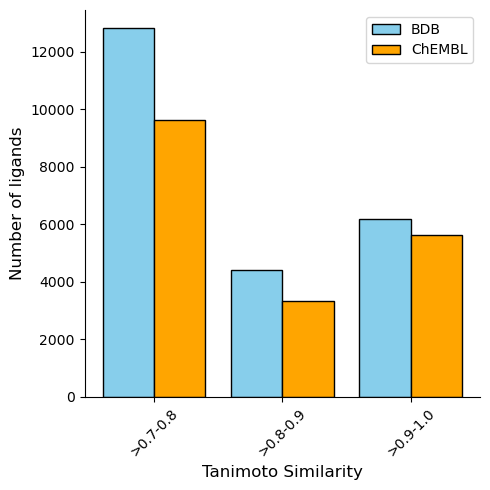

In [413]:
bins = [0.7, 0.8, 0.9, 1.0]
labels = [">0.7-0.8", ">0.8-0.9", ">0.9-1.0"]
centers = 0.5 * (np.array(bins[:-1]) + np.array(bins[1:]))
bar_width = 0.04  

counts_bdb, _ = np.histogram(filtered_bdb_best_temp_unique.Tanimoto_Similarity.dropna(), bins=bins)

counts_chembl, _ = np.histogram(filtered_che_best_temp_unique.Tanimoto_Similarity.dropna(), bins=bins)

plt.figure(figsize=(5, 5))

plt.bar(centers - bar_width/2, counts_bdb, width=bar_width, color='skyblue', edgecolor='black', label='BDB')
plt.bar(centers + bar_width/2, counts_chembl, width=bar_width, color='orange', edgecolor='black', label='ChEMBL')

plt.xticks(centers, labels, rotation=45, fontsize=10)
plt.xlabel("Tanimoto Similarity", fontsize=12)
plt.ylabel("Number of ligands", fontsize=12)

# Formatting
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

plt.legend()
plt.tight_layout()

# plt.savefig('../images/tanimoto_similarity_distribution_dockbind.png', 
#             dpi=300,
#             bbox_inches='tight')

plt.show()


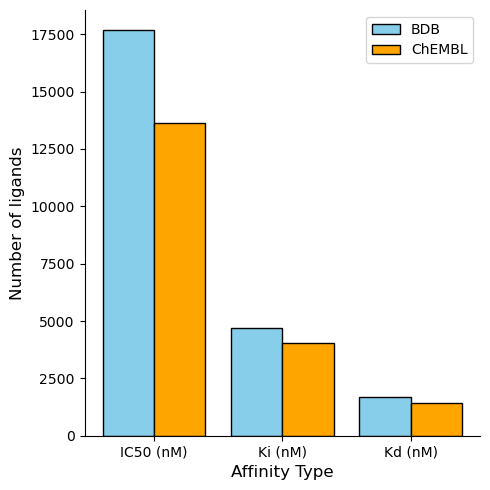

In [414]:
affinity_types = ['IC50 (nM)', 'Ki (nM)', 'Kd (nM)']

bdb_counts = filtered_bdb_best_temp_unique['Affinity_Type'].value_counts()
chembl_counts = filtered_che_best_temp_unique['Affinity_Type'].value_counts()

bdb_vals = [bdb_counts.get(aff, 0) for aff in affinity_types]
chembl_vals = [chembl_counts.get(aff, 0) for aff in affinity_types]

x = np.arange(len(affinity_types))
bar_width = 0.4

plt.figure(figsize=(5, 5))

plt.bar(x - bar_width/2, bdb_vals, width=bar_width, label='BDB', color='skyblue', edgecolor='black')
plt.bar(x + bar_width/2, chembl_vals, width=bar_width, label='ChEMBL', color='orange', edgecolor='black')

plt.xticks(x, affinity_types)
plt.xlabel("Affinity Type", fontsize=12)
plt.ylabel("Number of ligands", fontsize=12)
plt.legend()

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# plt.savefig('../images/affinity_type_distribution_dockbind.png', 
#             dpi=300,
#             bbox_inches='tight')

plt.tight_layout()
plt.show()


# Compare the chemical space with PDBbind

In [368]:
df_pdbbind = pd.read_csv('../data/PDBbind_dataset.csv', usecols=['SMILES', 'Source'])
df_pdbbind

,Complex_ID,SMILES,Source
0,6ayo,CCC[C@H]1C[N@@H+](Cc2c[nH]c3c(N)ncnc23)C[C@@H]1O,PDBbind
1,2pqc,C[C@](O[C@@H]1CC(C(=O)[O-])=C[C@@H](OP(=O)([O-...,PDBbind
2,1oyt,NC(=[NH2+])c1ccc([C@H]2[C@H]3C(=O)N(Cc4ccc(F)c...,PDBbind
3,2q1q,NS(=O)(=O)c1ccc(N2CCCCS2(=O)=O)cc1,PDBbind
4,2yix,CCNC(=O)NCc1ccccc1Sc1ccc2nnc(C(C)C)n2c1,PDBbind
...,...,...,...
5300,4re2,OC[C@@H]1[C@@H](O)[C@H](O)[C@H](O)c2nccn21,PDBbind
5301,5f1h,COc1cc(-c2cn(C)c(=O)c3cnccc23)c(OC)cc1C[NH+](C)C,PDBbind
5302,4qge,COc1ccc(NC(=O)[C@@H](C)Nc2nc3c(cnn3C3CCCC3)c(=...,PDBbind
5303,5c28,Cc1c(N)nc(C2CC2)nc1Cl,PDBbind


In [248]:
dockbind_all = pd.concat([filtered_bdb_best_temp_unique, filtered_che_best_temp_unique], ignore_index=True)

dockbind_all = dockbind_all[['Docked_Smiles']]

dockbind_all = dockbind_all.rename(columns={'Docked_Smiles': 'SMILES'})

dockbind_all['Source'] = 'DockBind'

In [254]:
df_all = pd.concat([dockbind_all, df_pdbbind], ignore_index=True)

In [256]:
df_all["Mol"] = df_all["SMILES"].apply(Chem.MolFromSmiles)
df_all

,SMILES,Source,Mol
0,[O-]P([O-])(=O)CC(=O)NCCCc1cccc(Oc2ccccc2)c1,DockBind,<rdkit.Chem.rdchem.Mol object at 0x70783cb38a50>
1,OS(=O)(=O)CC(=O)NCCCc1cccc(Oc2ccccc2)c1,DockBind,<rdkit.Chem.rdchem.Mol object at 0x70783cb39850>
2,OC(=O)C(=O)CC(=O)NCCCc1cccc(Oc2ccccc2)c1,DockBind,<rdkit.Chem.rdchem.Mol object at 0x70783cb3a0a0>
3,OC(=O)C(=O)CC(=O)NCCCc1cccc(Oc2ccccc2)c1,DockBind,<rdkit.Chem.rdchem.Mol object at 0x70783cb3b220>
4,CCCCCCOc1cccc(Cn2ccc(O)c(C(O)=O)c2=O)c1,DockBind,<rdkit.Chem.rdchem.Mol object at 0x70783cb3bed0>
...,...,...,...
48482,OC[C@@H]1[C@@H](O)[C@H](O)[C@H](O)c2nccn21,PDBbind,<rdkit.Chem.rdchem.Mol object at 0x7077ea783c30>
48483,COc1cc(-c2cn(C)c(=O)c3cnccc23)c(OC)cc1C[NH+](C)C,PDBbind,<rdkit.Chem.rdchem.Mol object at 0x7077ea783ca0>
48484,COc1ccc(NC(=O)[C@@H](C)Nc2nc3c(cnn3C3CCCC3)c(=...,PDBbind,<rdkit.Chem.rdchem.Mol object at 0x7077ea783d10>
48485,Cc1c(N)nc(C2CC2)nc1Cl,PDBbind,<rdkit.Chem.rdchem.Mol object at 0x7077ea783d80>


In [258]:
fps = [AllChem.GetMorganGenerator(radius=2, fpSize=2048).GetFingerprint(m)
       for m in df_all["Mol"] if m is not None]
fps_array = np.array([np.array(fp) for fp in fps])


In [260]:
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(fps_array)

/scratch/software/miniconda3/envs/my-rdkit-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/scratch/software/miniconda3/envs/my-rdkit-env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/scratch/software/miniconda3/envs/my-rdkit-env/lib/python3.10/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/scratch/software/miniconda3/envs/my-rdkit-env/lib/python3.10/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or 

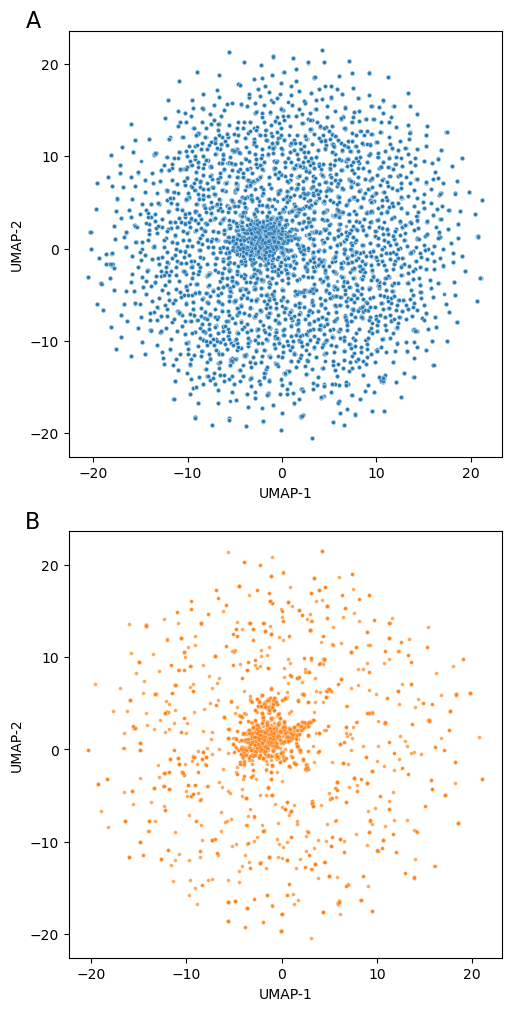

In [313]:
sources = df_all['Source'].unique()
colors = {"DockBind": "blue", "PDBbind": "red"}
plot_labels = ['A', 'B']
               
fig, axes = plt.subplots(2, 1, figsize=(5, 10), constrained_layout=True)

# Panel A: DockBind
df_dockbind = df_all[df_all["Source"] == "DockBind"]
sns.scatterplot(data=df_dockbind, x='UMAP_1', y='UMAP_2', alpha=0.7, s=7, ax=axes[0], color='#1f77b4')  # navy blue
axes[0].set_xlabel("UMAP-1")
axes[0].set_ylabel("UMAP-2")
axes[0].text(-0.1, 1.05, 'A', fontsize=16, ha='left', va='top', transform=axes[0].transAxes)

# Panel B: PDBbind
df_pdbbind = df_all[df_all["Source"] == "PDBbind"]
sns.scatterplot(data=df_pdbbind, x='UMAP_1', y='UMAP_2', alpha=0.7, s=7, ax=axes[1], color='#ff7f0e')  # dark orange
axes[1].set_xlabel("UMAP-1")
axes[1].set_ylabel("UMAP-2")
axes[1].text(-0.1, 1.05, 'B', fontsize=16, ha='left', va='top', transform=axes[1].transAxes)

plt.savefig('../images/chemical_space.png', dpi=300, bbox_inches='tight')

plt.show()


# Plot the affinity distribution

In [390]:
df_affinity = pd.read_csv(
    '/Home/siv33/ped023/Downloads/PDBbind_v2020_plain_text_index/index/INDEX_refined_data.2020',
    delim_whitespace=True,
    comment="#",
    header=None,
    names=["PDB_code", "Resolution", "Year", "Kd_Ki", "--", "PDF_info", "Ligand"])

# Split 'Kd_Ki' into Type and Affinity
df_affinity[['Type', 'Affinity']] = df_affinity['Kd_Ki'].str.split('=', expand=True)

# Extract numeric value and unit from 'Affinity' column without dropping other columns
df_affinity[['Affinity_value', 'Affinity_unit']] = df_affinity['Affinity'].str.extract(r'([\d\.]+)([a-zA-Z]+)')

# Convert numeric part to float
df_affinity['Affinity_value'] = df_affinity['Affinity_value'].astype(float)

conversion_to_nM = {'mM': 1000000,
                    'uM': 1000,
                    'nM': 1,
                    'pM': 0.001,
                    'fM': 0.000001}

df_affinity['Affinity_nM'] = df_affinity.apply(lambda row: row['Affinity_value'] * conversion_to_nM.get(row['Affinity_unit'], 1), axis=1)

df_affinity = df_affinity.drop(columns=['PDB_code', 'Resolution', 'Year', 'Affinity', 'Affinity_value',
                                        'Kd_Ki', '--', 'PDF_info', 'Ligand', 'Affinity_unit'])


/tmp/ipykernel_7254/926251326.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_affinity = pd.read_csv(


In [398]:
pdbbind = pd.read_csv('../data/PDBbind_dataset.csv')
df_affinity_reset = df_affinity.reset_index()
df_affinity_reset.rename(columns={'index': 'Complex_ID'}, inplace=True)
# Merge on Complex_ID column
pdbbind_aff = pd.merge(pdbbind, df_affinity_reset, on='Complex_ID', how='left')

dockbind_aff = pd.concat([filtered_bdb_best_temp_unique, filtered_che_best_temp_unique], ignore_index=True)
dockbind_aff

,UniProt_ID,Template,Docked,Template_Smiles,Docked_Smiles,Affinity_Type,Binding_Affinity,Tanimoto_Similarity
0,A9JQL9,4F6V_ZYM,BINDINGDB50268510,c1ccc(cc1)Oc2cccc(c2)CCCNC(=O)CC(=O)C(=O)O,[O-]P([O-])(=O)CC(=O)NCCCc1cccc(Oc2ccccc2)c1,Ki (nM),40.00000,0.72340
1,A9JQL9,4F6V_ZYM,BINDINGDB50268565,c1ccc(cc1)Oc2cccc(c2)CCCNC(=O)CC(=O)C(=O)O,OS(=O)(=O)CC(=O)NCCCc1cccc(Oc2ccccc2)c1,Ki (nM),810.00000,0.70213
2,A9JQL9,4F6V_ZYM,BINDINGDB50388903,c1ccc(cc1)Oc2cccc(c2)CCCNC(=O)CC(=O)C(=O)O,OC(=O)C(=O)CC(=O)NCCCc1cccc(Oc2ccccc2)c1,IC50 (nM),14000.00000,1.00000
3,A9JQL9,4F6V_ZYM,BINDINGDB50388903,c1ccc(cc1)Oc2cccc(c2)CCCNC(=O)CC(=O)C(=O)O,OC(=O)C(=O)CC(=O)NCCCc1cccc(Oc2ccccc2)c1,Ki (nM),250.00000,1.00000
4,A9JQL9,4F6X_ZYL,BINDINGDB50388906,CCCCCCOc1cccc(c1)CN2C=CC(=C(C2=O)C(=O)O)O,CCCCCCOc1cccc(Cn2ccc(O)c(C(O)=O)c2=O)c1,IC50 (nM),39150.00000,1.00000
...,...,...,...,...,...,...,...,...
43177,Q9Y6F1,4L7L_1VA,CHEMBL3092523,c1ccc(cc1)C[C@@H](CO)NC(=O)CCC2=Nc3ccccc3C(=O)N2,COC(=O)[C@H](Cc1ccccc1)NC(=O)CCc1nc2ccccc2c(=O...,IC50 (nM),2200.00000,0.69643
43178,Q9Y6F1,4L7L_1VA,CHEMBL3092553,c1ccc(cc1)C[C@@H](CO)NC(=O)CCC2=Nc3ccccc3C(=O)N2,O=C(CCc1nc2ccccc2c(=O)[nH]1)N[C@H](CO)Cc1ccccc1,IC50 (nM),1000.00000,1.00000
43179,Q9Y6F1,4L7R_M00,CHEMBL3092520,CC[C@@H](CO)NC(=O)CCC1=Nc2ccccc2C(=O)N1,C[C@@H](CO)NC(=O)CCc1nc2ccccc2c(=O)[nH]1,IC50 (nM),11100.00000,0.76000
43180,Q9Y6F1,4L7R_M00,CHEMBL3092521,CC[C@@H](CO)NC(=O)CCC1=Nc2ccccc2C(=O)N1,CC[C@@H](CO)NC(=O)CCc1nc2ccccc2c(=O)[nH]1,IC50 (nM),9600.00000,1.00000


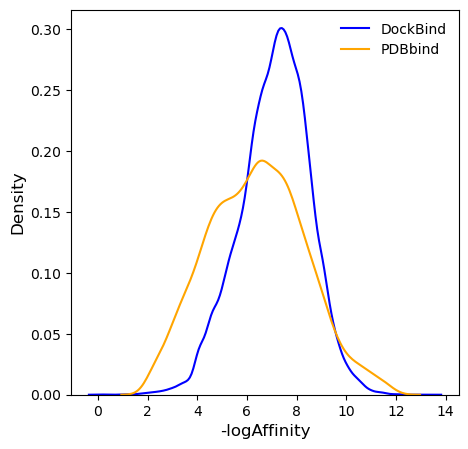

In [419]:
def compute_log_affinity(affinity_nM):

    affinity_M = affinity_nM * 1e-9
    
    return -np.log10(affinity_M)

dockbind_aff = dockbind_aff[dockbind_aff['Binding_Affinity'] !=0].reset_index(drop=True)
pdbbind_aff = pdbbind_aff[pdbbind_aff['Affinity_nM'] != 0].reset_index(drop=True)

# Calculate log affinity
dockbind_aff['log_affinity'] = dockbind_aff['Binding_Affinity'].apply(compute_log_affinity)
pdbbind_aff['log_affinity'] = pdbbind_aff['Affinity_nM'].apply(compute_log_affinity)




# Plot histograms side by side
plt.figure(figsize=(5,5))

sns.kdeplot(dockbind_aff['log_affinity'], color='blue', label='DockBind')
sns.kdeplot(pdbbind_aff['log_affinity'], color='orange', label='PDBbind')

plt.xlabel('-logAffinity', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10, frameon=False)

plt.savefig('../images/logaffinity.png', dpi=300, bbox_inches='tight')

plt.show()

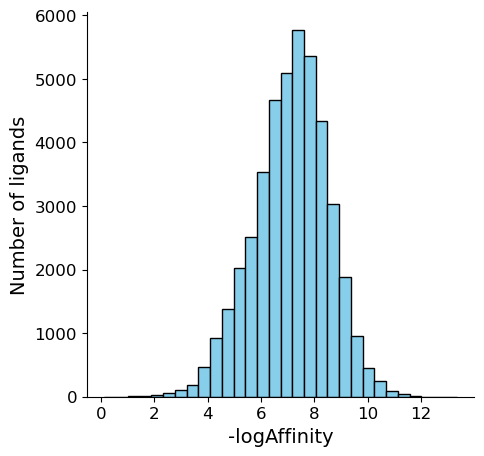

In [430]:
plt.figure(figsize=(5,5))

plt.hist(dockbind_aff['log_affinity'], bins=30, edgecolor='black', color='skyblue', label='DockBind')

plt.xlabel('-logAffinity', fontsize=14)
plt.ylabel('Number of ligands', fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')

plt.savefig('../images/dockbind_logaffinity.png', dpi=300, bbox_inches='tight')

plt.show()

In [407]:
pdbbind_aff[pdbbind_aff['Affinity_nM'].isna()]



,Complex_ID,SMILES,Source,Type,Affinity_nM,log_affinity


In [411]:
print(dockbind_aff['Binding_Affinity'][dockbind_aff['Binding_Affinity'] <= 0])
print(pdbbind_aff['Affinity_nM'][pdbbind_aff['Affinity_nM'] <= 0])

2788    0.00000
10410   0.00000
10428   0.00000
Name: Binding_Affinity, dtype: float64
Series([], Name: Affinity_nM, dtype: float64)


,UniProt_ID,Template,Docked,Template_Smiles,Docked_Smiles,Affinity_Type,Binding_Affinity,Tanimoto_Similarity,log_affinity
2788,P00375,1U70_MTX,BINDINGDB66082,CN(Cc1cnc2c(n1)c(nc(n2)N)N)c3ccc(cc3)C(=O)N[C@...,CN(Cc1cnc2nc(N)nc(N)c2n1)c1ccc(cc1)C(=O)N[C@@H...,Ki (nM),0.00000,1.00000,inf


Start with Chembl

In [168]:
final_che = filtered_che.copy()
final_che = final_che[['UniProt_ID', 'Template', 'Docked', 'canonical_smiles', 'Ki (nM)', 'Kd (nM)', 'IC50 (nM)']]

# --- Calculate log aff ---
final_che['pK'] = final_che.apply(compute_log_affinity, axis=1)
final_che = final_che.drop(columns=['Ki (nM)', 'Kd (nM)', 'IC50 (nM)'])

# --- Create a log aff dictionary ---
final_che['unique_id'] = final_che.UniProt_ID + '_' + final_che.Docked
pk_dict = final_che.groupby('unique_id')['pK'].mean().to_dict()

# --- Drop duplicated entries and retrieve the mean log aff ---
final_che = final_che.drop_duplicates(subset=['UniProt_ID', 'Template', 'Docked'])
final_che = final_che.rename(columns={'pK': 'old_pk',
                                      'canonical_smiles': 'Ligand_SMILES'
                                     })

# --- Drop unnecessary columns and save ---
final_che['pK'] = final_che['unique_id'].map(pk_dict)
final_che = final_che.drop(columns=['old_pk', 'unique_id']).reset_index(drop=True)

final_che.to_csv('../data/ChEMBL_activities_refined.csv', index=False)

final_che

,UniProt_ID,Template,Docked,Ligand_SMILES,pK
0,A4TVL0,6R11_JOB,CHEMBL4455877,Nc1ccc2c(c1)C(=O)N(C1CC(=O)NC1=O)C2=O,4.920819
1,A4TVL0,6R1K_JPB,CHEMBL4437349,O=C1CC(NC(=O)c2c(Cl)cc(Cl)cc2Cl)C(=O)N1,5.045757
2,A5H660,6HU0_T86,CHEMBL3797232,O=C(NO)c1ccc(Cl)c(NC(=O)c2ccc(Cl)cc2Cl)c1,6.719025
3,A5H660,6HU1_GT2,CHEMBL3797232,O=C(NO)c1ccc(Cl)c(NC(=O)c2ccc(Cl)cc2Cl)c1,6.719025
4,A5H660,6HTH_GQN,CHEMBL3799246,CCOc1ccc(C(=O)NO)cc1NC(=O)c1ccc(-c2ccccc2)cc1,7.038109
...,...,...,...,...,...
24458,Q8IVV7,7U3F_L5L,CHEMBL5194502,Cc1ccc(C2NCCc3sccc32)cc1,4.259637
24459,Q8IVV7,7U3G_L6F,CHEMBL5189044,Nc1cccc2c1CCNC2c1ccccc1,6.246545
24460,Q8IVV7,7U3J_L6U,CHEMBL5208789,CNC(=O)[C@H](CCc1ccccc1)NC(=O)[C@H](NC(=O)CNCc...,5.267606
24461,Q8IVV7,7U3K_L73,CHEMBL5177515,CCCCNCC(=O)N[C@H](Cc1ccc(C(C)(C)C)cc1)C(=O)N[C...,5.327902


Now BindingDB 

In [171]:
final_bdb = filtered_bdb.copy()
final_bdb = final_bdb[['UniProt_ID', 'Template', 'Docked', 'Ligand SMILES', 'Ki (nM)', 'IC50 (nM)', 'Kd (nM)']]

aff_cols = ['Ki (nM)', 'Kd (nM)', 'IC50 (nM)']

# --- Drop rows with these characters in the baff and set them to floats---
pattern = r'[Ee><+]'
final_bdb = final_bdb[~final_bdb[aff_cols].astype(str).apply(lambda col: col.str.contains(pattern)).any(axis=1)]
final_bdb[aff_cols] = final_bdb[aff_cols].astype(float)

# --- Calculate log aff ---
final_bdb['pK'] = final_bdb.apply(compute_log_affinity, axis=1)
final_bdb = final_bdb.drop(columns=['Ki (nM)', 'Kd (nM)', 'IC50 (nM)'])

# --- Add BINDINGDB in from of docked IDs and drop nans from before ---
final_bdb = final_bdb.dropna()
final_bdb['Docked'] = 'BINDINGDB' + final_bdb.Docked.astype(str)

# --- Create a log aff dictionary ---
final_bdb['unique_id'] = final_bdb.UniProt_ID + '_' + final_bdb.Docked
pk_dict = final_bdb.groupby('unique_id')['pK'].mean().to_dict()

# --- Drop duplicated entries and retrieve the mean log aff ---
final_bdb = final_bdb.drop_duplicates(subset=['UniProt_ID', 'Template', 'Docked'])
final_bdb = final_bdb.rename(columns={'pK': 'old_pk',
                                      'Ligand SMILES': 'Ligand_SMILES'
                                     })

# --- Drop unnecessary columns and save ---
final_bdb['pK'] = final_bdb['unique_id'].map(pk_dict)
final_bdb = final_bdb.drop(columns=['old_pk', 'unique_id']).reset_index(drop=True)

final_bdb.to_csv('../data/BindingDB_activities_refined.csv', index=False)

final_bdb

,UniProt_ID,Template,Docked,Ligand_SMILES,pK
0,P51570,6ZFH_QV2,BINDINGDB2764,O=C1CCCC2=C1C1(CCS(=O)(=O)C1)N=C(Nc1nc3ccccc3o...,5.175425
1,P04585,6DIF_TPV,BINDINGDB557,CCC[C@]1(CCc2ccccc2)CC(=O)C([C@H](CC)c2cccc(NS...,10.744727
2,P04585,6DIL_TPV,BINDINGDB557,CCC[C@]1(CCc2ccccc2)CC(=O)C([C@H](CC)c2cccc(NS...,10.744727
3,P04585,6DIF_TPV,BINDINGDB558,CCC[C@@]1(CCc2ccccc2)CC(=O)C([C@H](CC)c2cccc(N...,11.096910
4,P04585,6DIL_TPV,BINDINGDB558,CCC[C@@]1(CCc2ccccc2)CC(=O)C([C@H](CC)c2cccc(N...,11.096910
...,...,...,...,...,...
32464,O60885,8PXM_ZTY,BINDINGDB50607742,CCOc1ccc2C(C)C(=O)N(C)C=Cc2c1,6.150081
32465,O60885,8PXN_ZTT,BINDINGDB50607743,COCCOc1ccc2[C@@H](C)C(=O)N(C)C=Cc2c1,6.300246
32466,O60885,8PXM_ZTY,BINDINGDB50607743,COCCOc1ccc2[C@@H](C)C(=O)N(C)C=Cc2c1,6.300246
32467,O60885,8PXN_ZTT,BINDINGDB50607744,CC1c2ccc(OCC(C)(C)O)cc2C=CN(C)C1=O,6.350253


# Dataset analysis

First load the selected templates and make image for number of templates per targets

In [15]:
templates_df = pd.read_csv('../data/selected_templates_updated_2024.csv')
templates_df

,UniProt_ID,Template,Smiles_String,CHEMBL_ID,target_chembl_id,assay_chembl_id,Ki (nM),Kd (nM),IC50 (nM)
0,A0A024E3Q2,4MWQ_G39,CCC(CC)O[C@@H]1C=C(C[C@@H]([C@H]1NC(=O)C)N)C(=O)O,CHEMBL674,NaN,NaN,NaN,NaN,0.79
1,A0A024E3Q2,4MWR_ZMR,[H]/N=C(N)/N[C@H]1C=C(O[C@H]([C@@H]1NC(=O)C)[C...,CHEMBL222813,NaN,NaN,NaN,NaN,0.41
2,A0A024E3Q2,4MWU_LNV,[H]/N=C(N)/N[C@H]1C=C(O[C@H]([C@@H]1NC(=O)C)[C...,CHEMBL466246,NaN,NaN,NaN,NaN,3.24
3,A0A024E3Q2,4MWV_BCZ,CCC(CC)[C@@H]([C@H]1[C@@H](C[C@@H]([C@H]1O)C(=...,CHEMBL139367,NaN,NaN,NaN,NaN,0.40
4,A0A024V0B1,4ZY0_4TM,CC(C)(C)C(=O)N[C@H](c1ccc(cc1)c2ccsc2)C(=O)NO,NaN,NaN,NaN,9.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
16767,Q8IVV7,7U3K_L73,CCCCNCC(=O)NC(Cc1ccc(cc1)C(C)(C)C)C(=O)NC(Cc2c...,NaN,NaN,NaN,NaN,NaN,NaN
16768,Q8IVV7,7U3L_L4X,Cc1ccc(cc1)CC(C(=O)NC)NC(=O)C(CC=Cc2ccccc2)NC(...,NaN,NaN,NaN,NaN,NaN,NaN
16769,K9N7C7,8CZT_P8L,CC(C)CC(C(=O)NC(CC1CCNC1=O)C(O)[S+](=O)(O)O)NC...,NaN,NaN,NaN,NaN,NaN,NaN
16770,K9N7C7,8E6B_URR,CC(C)CC(C(=O)NC(CC1CCNC1=O)C(O)S(=O)(=O)O)NC(=...,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
print(len(templates_df.UniProt_ID.unique()))

1324


In [17]:
uniprot_counts = templates_df['UniProt_ID'].value_counts()
bins = [0, 2, 5, 10, 20, 30, 40, 50, float('inf')]
labels = [f"{bins[i]+1} - {bins[i+1]}" if bins[i+1] != float('inf') else f"> {bins[i]+1}" for i in range(len(bins)-1)]

binned = pd.cut(uniprot_counts, bins=bins, right=True, labels=labels)
hist_data = binned.value_counts().sort_index()

In [18]:
hist_data.sum()

1324

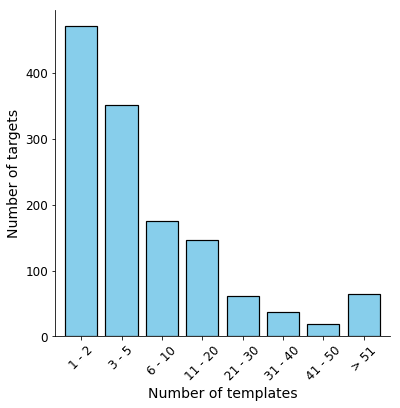

In [19]:
plt.figure(figsize=(6, 6))
hist_data.plot(kind='bar', color='skyblue', edgecolor='black', width=0.8, linewidth=1.2)

plt.xlabel('Number of templates', fontsize=14)
plt.ylabel('Number of targets', fontsize=14)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
# plt.text(-0.1, 1, 'A', fontsize=20, ha='center', va='center', transform=plt.gca().transAxes)
plt.savefig('../images/templates_per_target.png', dpi=300, bbox_inches='tight')
plt.show()


Now load and check the selected ligands to dock

In [20]:
che_to_dock = pd.read_csv('../data/ChEMBL_ligands_selected_for_docking.csv')
bdb_to_dock = pd.read_csv('../data/BindingDB_ligands_selected_for_docking.csv')

In [21]:
che_to_dock = che_to_dock.rename(columns={'ChEMBL_ID': 'Docked',
                                          'ChEMBL_Smiles': 'Docked_Smiles'
                                         })
bdb_to_dock = bdb_to_dock.rename(columns={'BindingDB_ID': 'Docked',
                                          'BindingDB_Smiles': 'Docked_Smiles'
                                         })


In [22]:
combined_to_dock = pd.concat([che_to_dock, bdb_to_dock])
combined_to_dock

,UniProt_ID,BM_Template,BM_Smiles,Docked,Docked_Smiles,Tanimoto_Similarity
0,A4TVL0,6R11_JOB,c1cc2c(cc1N)C(=O)N(C2=O)[C@H]3CC(=O)NC3=O,CHEMBL4455877,Nc1ccc2c(c1)C(=O)N(C1CC(=O)NC1=O)C2=O,1.00
1,A4TVL0,6R1D_JP5,c1ccc(cc1)COC(=O)N[C@H]2CC(=O)NC2=O,CHEMBL4464143,O=C1CC(NC(=O)OCc2ccccc2)C(=O)N1,1.00
2,A4TVL0,6R1D_JP5,c1ccc(cc1)COC(=O)N[C@H]2CC(=O)NC2=O,CHEMBL4556836,NCc1ccc(COC(=O)NC2CC(=O)NC2=O)cc1,0.77
3,A4TVL0,6R1K_JPB,c1c(cc(c(c1Cl)C(=O)N[C@H]2CC(=O)NC2=O)Cl)Cl,CHEMBL4437349,O=C1CC(NC(=O)c2c(Cl)cc(Cl)cc2Cl)C(=O)N1,1.00
4,A5H660,4BZ6_SHH,c1ccc(cc1)NC(=O)CCCCCCC(=O)NO,CHEMBL98,O=C(CCCCCCC(=O)Nc1ccccc1)NO,1.00
...,...,...,...,...,...,...
64521,Q9Y6F1,4L7R_M00,CC[C@@H](CO)NC(=O)CCC1=Nc2ccccc2C(=O)N1,50444029,CC[C@@H](CO)NC(=O)CCc1nc2ccccc2c(=O)[nH]1,1.00
64522,Q9Y6F1,4L7R_M00,CC[C@@H](CO)NC(=O)CCC1=Nc2ccccc2C(=O)N1,50444030,C[C@@H](CO)NC(=O)CCc1nc2ccccc2c(=O)[nH]1,0.93
64523,Q9Y6F1,4L7R_M00,CC[C@@H](CO)NC(=O)CCC1=Nc2ccccc2C(=O)N1,50444033,OC[C@H](Cc1ccccc1)NC(=O)CCc1nc2ccccc2c(=O)[nH]1,0.82
64524,Q9ZLT0,2JFZ_003,CC(C)CN1c2c(c(n(n2)Cc3cccc4c3cccc4)c5ccncc5)C(...,50421085,CC(C)Cn1c2nn(Cc3cccc4ccccc34)c(-c3cncn3C)c2c(=...,0.75


In [23]:
unique_to_dock = combined_to_dock.drop_duplicates(subset=['UniProt_ID', 'Docked'])

In [24]:
len(unique_to_dock.UniProt_ID.unique())

683

In [90]:
len(unique_to_dock.Docked.unique())

61621

In [93]:
ligand_to_dock_counts

P00918    1674
Q00987    1606
Q07820    1463
P56817    1445
Q16539    1402
          ... 
Q6XEC0       1
P0C559       1
P0A953       1
P00517       1
P05050       1
Name: UniProt_ID, Length: 683, dtype: int64

In [103]:
ligand_to_dock_counts = unique_to_dock['UniProt_ID'].value_counts()
bins = [0, 10, 25, 50, 100, 200, 500, float('inf')]
labels = [f"{bins[i]+1} - {bins[i+1]}" if bins[i+1] != float('inf') else f"> {bins[i]+1}" for i in range(len(bins)-1)]

binned = pd.cut(ligand_to_dock_counts, bins=bins, right=True, labels=labels)
hist_data = binned.value_counts().sort_index()

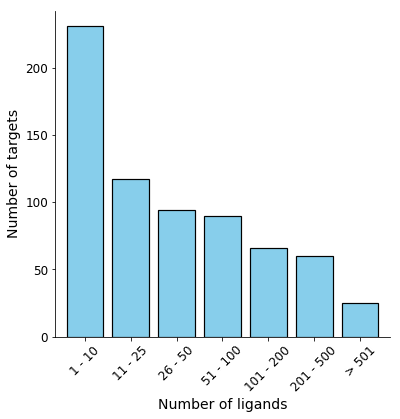

In [105]:
plt.figure(figsize=(6, 6))
hist_data.plot(kind='bar', color='skyblue', edgecolor='black', width=0.8, linewidth=1.2)

plt.xlabel('Number of ligands', fontsize=14)
plt.ylabel('Number of targets', fontsize=14)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_color('black')
plt.gca().spines['left'].set_color('black')
# plt.text(-0.1, 1, 'A', fontsize=20, ha='center', va='center', transform=plt.gca().transAxes)
plt.savefig('../images/ligands_to_dock_per_target.png', dpi=300, bbox_inches='tight')
plt.show()

In [67]:
final_bdb = pd.read_csv('../data/BindingDB_activities_refined.csv')
final_che = pd.read_csv('../data/ChEMBL_activities_refined.csv')


In [68]:
combined = pd.concat([final_che, final_bdb]).reset_index(drop=True)
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56932 entries, 0 to 56931
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   UniProt_ID     56932 non-null  object 
 1   Template       56932 non-null  object 
 2   Docked         56932 non-null  object 
 3   Ligand_SMILES  56932 non-null  object 
 4   pK             56932 non-null  float64
dtypes: float64(1), object(4)
memory usage: 2.2+ MB


In [69]:
combined.drop_duplicates(subset=['UniProt_ID', 'Docked'])

,UniProt_ID,Template,Docked,Ligand_SMILES,pK
0,A4TVL0,6R11_JOB,CHEMBL4455877,Nc1ccc2c(c1)C(=O)N(C1CC(=O)NC1=O)C2=O,4.920819
1,A4TVL0,6R1K_JPB,CHEMBL4437349,O=C1CC(NC(=O)c2c(Cl)cc(Cl)cc2Cl)C(=O)N1,5.045757
2,A5H660,6HU0_T86,CHEMBL3797232,O=C(NO)c1ccc(Cl)c(NC(=O)c2ccc(Cl)cc2Cl)c1,6.719025
4,A5H660,6HTH_GQN,CHEMBL3799246,CCOc1ccc(C(=O)NO)cc1NC(=O)c1ccc(-c2ccccc2)cc1,7.038109
5,A5H660,4BZ6_SHH,CHEMBL98,O=C(CCCCCCC(=O)Nc1ccccc1)NO,5.913224
...,...,...,...,...,...
56923,Q96PN6,8B75_PJU,BINDINGDB50607686,Nc1nc(Cl)cc(n1)-c1nn(cc1Cc1ccccc1OCCN1CCOC[C@H...,8.667679
56924,O60885,8PXN_ZTT,BINDINGDB50607740,COc1ccc2[C@@H](C)C(=O)N(C)C=Cc2c1,5.999971
56926,O60885,8PXN_ZTT,BINDINGDB50607742,CCOc1ccc2C(C)C(=O)N(C)C=Cc2c1,6.150081
56928,O60885,8PXN_ZTT,BINDINGDB50607743,COCCOc1ccc2[C@@H](C)C(=O)N(C)C=Cc2c1,6.300246


In [70]:
combined['InChIKey'] = combined['Ligand_SMILES'].apply(smiles_to_inchikey)

In [71]:
combined.drop_duplicates(subset=['UniProt_ID', 'InChIKey'])

,UniProt_ID,Template,Docked,Ligand_SMILES,pK,InChIKey
0,A4TVL0,6R11_JOB,CHEMBL4455877,Nc1ccc2c(c1)C(=O)N(C1CC(=O)NC1=O)C2=O,4.920819,ZQAUOFWDVHCTPN-UHFFFAOYSA-N
1,A4TVL0,6R1K_JPB,CHEMBL4437349,O=C1CC(NC(=O)c2c(Cl)cc(Cl)cc2Cl)C(=O)N1,5.045757,LBWIBZYKUVIBKH-UHFFFAOYSA-N
2,A5H660,6HU0_T86,CHEMBL3797232,O=C(NO)c1ccc(Cl)c(NC(=O)c2ccc(Cl)cc2Cl)c1,6.719025,UYUPOQDZJBPUTQ-UHFFFAOYSA-N
4,A5H660,6HTH_GQN,CHEMBL3799246,CCOc1ccc(C(=O)NO)cc1NC(=O)c1ccc(-c2ccccc2)cc1,7.038109,CWISRDFYKNBKMA-UHFFFAOYSA-N
5,A5H660,4BZ6_SHH,CHEMBL98,O=C(CCCCCCC(=O)Nc1ccccc1)NO,5.913224,WAEXFXRVDQXREF-UHFFFAOYSA-N
...,...,...,...,...,...,...
56845,Q9NWT6,2YDE_S2G,BINDINGDB50344962,O[C@@H](CCC(O)=O)C(O)=O,2.823909,HWXBTNAVRSUOJR-VKHMYHEASA-N
56871,P27338,4A79_P1B,BINDINGDB50103521,CCc1ccc(CCOc2ccc(CC3SC(=O)NC3=O)cc2)nc1,6.525784,HYAFETHFCAUJAY-UHFFFAOYSA-N
56908,P00746,8D95_QIE,BINDINGDB50607444,Brc1cccc(NC(=O)[C@@H]2CCCN2C(=O)Cc2cccc(c2)C#N)n1,4.455932,GFCSVBQGHZQNKJ-HNNXBMFYSA-N
56919,Q96PN6,8B75_PJU,BINDINGDB50607681,COC(=O)[C@@H]1COCCN1CCOc1ccccc1Cc1cn(nc1-c1cc(...,8.629819,XHTFJTUBYAPEAW-KRWDZBQOSA-N


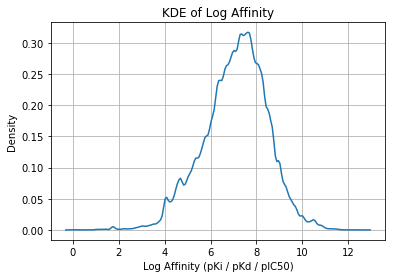

In [112]:
sns.kdeplot(combined['pK'].dropna(), bw_adjust=0.5)  # bw_adjust tunes smoothness

plt.title('KDE of Log Affinity')
plt.xlabel('Log Affinity (pKi / pKd / pIC50)')
plt.ylabel('Density')
plt.grid(True)
plt.show()

36474
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 36474 samples in 12.042s...
[t-SNE] Computed neighbors for 36474 samples in 2012.689s...
[t-SNE] Computed conditional probabilities for sample 1000 / 36474
[t-SNE] Computed conditional probabilities for sample 2000 / 36474
[t-SNE] Computed conditional probabilities for sample 3000 / 36474
[t-SNE] Computed conditional probabilities for sample 4000 / 36474
[t-SNE] Computed conditional probabilities for sample 5000 / 36474
[t-SNE] Computed conditional probabilities for sample 6000 / 36474
[t-SNE] Computed conditional probabilities for sample 7000 / 36474
[t-SNE] Computed conditional probabilities for sample 8000 / 36474
[t-SNE] Computed conditional probabilities for sample 9000 / 36474
[t-SNE] Computed conditional probabilities for sample 10000 / 36474
[t-SNE] Computed conditional probabilities for sample 11000 / 36474
[t-SNE] Computed conditional probabilities for sample 12000 / 36474
[t-SNE] Computed conditional probabiliti

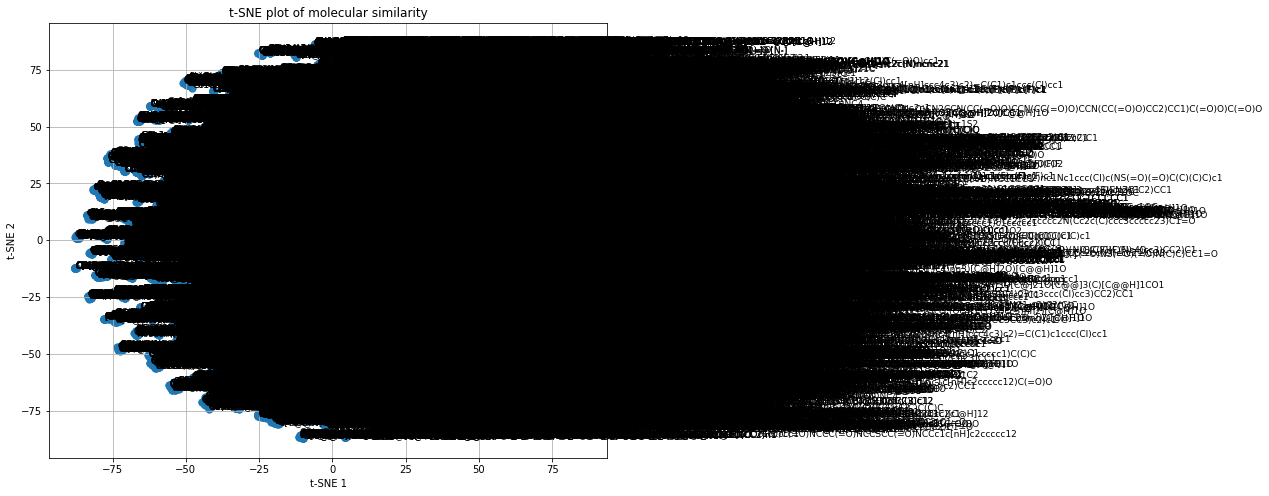

NameError: name 'plot_molecular_tsne' is not defined

In [114]:
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def fp_to_array(fp):
    arr = np.zeros((1,), dtype=np.int8)
    Chem.DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

mols = [Chem.MolFromSmiles(smi) for smi in combined['Ligand_SMILES'].unique()]
print(len(mols))
# Remove None (failed parsing)
valid_idx = [i for i, m in enumerate(mols) if m is not None]
mols = [mols[i] for i in valid_idx]
valid_smiles = [combined['Ligand_SMILES'].iloc[i] for i in valid_idx]

# Calculate Morgan fingerprints as numpy arrays
fps = [AllChem.GetMorganFingerprintAsBitVect(m, radius=2, nBits=1024) for m in mols]
fps_array = np.array([fp_to_array(fp) for fp in fps])

# Run t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, verbose=2)
tsne_results = tsne.fit_transform(fps_array)

# Plot
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], s=50, alpha=0.7)

for i, smi in enumerate(valid_smiles):
    plt.annotate(smi, (tsne_results[i,0], tsne_results[i,1]), fontsize=9)

plt.title('t-SNE plot of molecular similarity')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.savefig('DockBing_chemical_space.png')
plt.show()
# Example usage:
# Create a DataFrame with a SMILES column
# data = {'SMILES': ['CCO', 'CCN', 'CCC', 'CCCl', 'CCBr']}
# df = pd.DataFrame(data)

plot_molecular_tsne(combined)


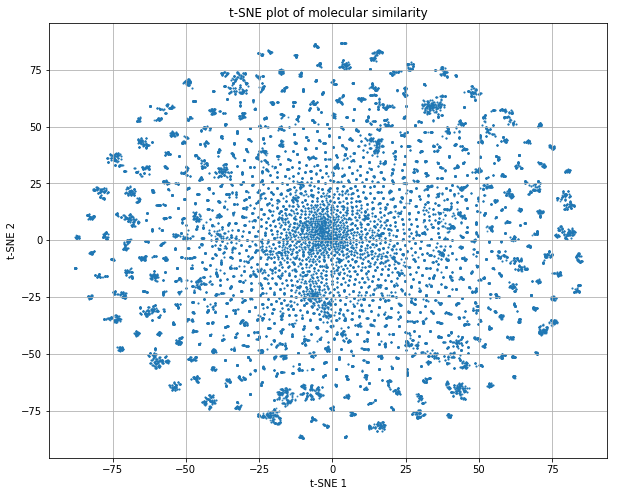

In [119]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:,0], tsne_results[:,1], s=1, alpha=0.7)

plt.title('t-SNE plot of molecular similarity')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
# plt.savefig('DockBing_chemical_space.png')
plt.show()

In [120]:
templates_df

,UniProt_ID,Template,Smiles_String,CHEMBL_ID,target_chembl_id,assay_chembl_id,Ki (nM),Kd (nM),IC50 (nM)
0,A0A024E3Q2,4MWQ_G39,CCC(CC)O[C@@H]1C=C(C[C@@H]([C@H]1NC(=O)C)N)C(=O)O,CHEMBL674,NaN,NaN,NaN,NaN,0.79
1,A0A024E3Q2,4MWR_ZMR,[H]/N=C(N)/N[C@H]1C=C(O[C@H]([C@@H]1NC(=O)C)[C...,CHEMBL222813,NaN,NaN,NaN,NaN,0.41
2,A0A024E3Q2,4MWU_LNV,[H]/N=C(N)/N[C@H]1C=C(O[C@H]([C@@H]1NC(=O)C)[C...,CHEMBL466246,NaN,NaN,NaN,NaN,3.24
3,A0A024E3Q2,4MWV_BCZ,CCC(CC)[C@@H]([C@H]1[C@@H](C[C@@H]([C@H]1O)C(=...,CHEMBL139367,NaN,NaN,NaN,NaN,0.40
4,A0A024V0B1,4ZY0_4TM,CC(C)(C)C(=O)N[C@H](c1ccc(cc1)c2ccsc2)C(=O)NO,NaN,NaN,NaN,9.1,NaN,NaN
...,...,...,...,...,...,...,...,...,...
16767,Q8IVV7,7U3K_L73,CCCCNCC(=O)NC(Cc1ccc(cc1)C(C)(C)C)C(=O)NC(Cc2c...,NaN,NaN,NaN,NaN,NaN,NaN
16768,Q8IVV7,7U3L_L4X,Cc1ccc(cc1)CC(C(=O)NC)NC(=O)C(CC=Cc2ccccc2)NC(...,NaN,NaN,NaN,NaN,NaN,NaN
16769,K9N7C7,8CZT_P8L,CC(C)CC(C(=O)NC(CC1CCNC1=O)C(O)[S+](=O)(O)O)NC...,NaN,NaN,NaN,NaN,NaN,NaN
16770,K9N7C7,8E6B_URR,CC(C)CC(C(=O)NC(CC1CCNC1=O)C(O)S(=O)(=O)O)NC(=...,NaN,NaN,NaN,NaN,NaN,NaN


RDKit ERROR: [13:26:39] Explicit valence for atom # 31 N, 4, is greater than permitted
RDKit ERROR: [13:26:39] Explicit valence for atom # 7 Cl, 5, is greater than permitted
RDKit ERROR: [13:26:39] Explicit valence for atom # 35 O, 3, is greater than permitted


36474
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 13171 samples in 2.371s...
[t-SNE] Computed neighbors for 13171 samples in 244.279s...
[t-SNE] Computed conditional probabilities for sample 1000 / 13171
[t-SNE] Computed conditional probabilities for sample 2000 / 13171
[t-SNE] Computed conditional probabilities for sample 3000 / 13171
[t-SNE] Computed conditional probabilities for sample 4000 / 13171
[t-SNE] Computed conditional probabilities for sample 5000 / 13171
[t-SNE] Computed conditional probabilities for sample 6000 / 13171
[t-SNE] Computed conditional probabilities for sample 7000 / 13171
[t-SNE] Computed conditional probabilities for sample 8000 / 13171
[t-SNE] Computed conditional probabilities for sample 9000 / 13171
[t-SNE] Computed conditional probabilities for sample 10000 / 13171
[t-SNE] Computed conditional probabilities for sample 11000 / 13171
[t-SNE] Computed conditional probabilities for sample 12000 / 13171
[t-SNE] Computed conditional probabilities

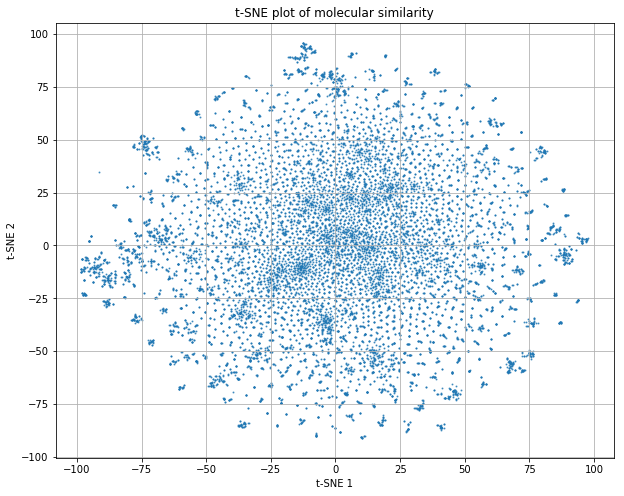

In [122]:
mols2 = [Chem.MolFromSmiles(smi) for smi in templates_df['Smiles_String'].unique()]
print(len(mols))
# Remove None (failed parsing)
valid_idx2 = [i for i, m in enumerate(mols2) if m is not None]
mols2 = [mols2[i] for i in valid_idx2]
valid_smiles2 = [templates_df['Smiles_String'].iloc[i] for i in valid_idx2]

# Calculate Morgan fingerprints as numpy arrays
fps2 = [AllChem.GetMorganFingerprintAsBitVect(m, radius=2, nBits=1024) for m in mols2]
fps_array2 = np.array([fp_to_array(fp) for fp in fps2])

# Run t-SNE
tsne2 = TSNE(n_components=2, random_state=42, perplexity=30, verbose=2)
tsne_results2 = tsne2.fit_transform(fps_array2)

plt.figure(figsize=(10, 8))
plt.scatter(tsne_results2[:,0], tsne_results2[:,1], s=1, alpha=0.7)

plt.title('t-SNE plot of molecular similarity')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.grid(True)
plt.savefig('../images/enriched_BindingMOAD_chemical_space.png')
plt.show()

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from tqdm import tqdm

smiles = combined['Ligand_SMILES'].unique()


In [13]:
# Convert SMILES to RDKit Mol objects
print('Preparing mols...')
mols = []
for s in tqdm(smiles):
    mols.append(Chem.MolFromSmiles(s))


# Calculate Morgan fingerprints (radius=2, 2048 bits)
print('Calculating fingerprints')
fps = []
for m in tqdm(mols):
    fps.append(AllChem.GetMorganFingerprintAsBitVect(m, radius=2, nBits=2048))
# Convert fingerprints to numpy arrays
print('Preparing array...')
fps_array = np.array([np.array(fp) for fp in fps])

# Apply PCA to reduce dimensionality to 2 components
print('Starting PCS')
pca = PCA(n_components=2, verbose=2)
print('PCA done. Fitting...')
coords = pca.fit_transform(fps_array)

# Plot the PCA result
plt.figure(figsize=(8,6))
plt.scatter(coords[:, 0], coords[:, 1], c='blue', s=50)

# Annotate points with SMILES
for i, smi in enumerate(smiles):
    plt.text(coords[i, 0] + 0.02, coords[i, 1], smi, fontsize=9)

plt.title('Chemical Space Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

Preparing mols...


100%|██████████| 36474/36474 [00:06<00:00, 5665.72it/s]


Calculating fingerprints


100%|██████████| 36474/36474 [00:01<00:00, 20417.74it/s]


Preparing array...


KeyboardInterrupt: 